In [245]:
import pandas as pd

## Lectura de datos

In [246]:
cruces = pd.read_csv('cruces.csv', sep=';', encoding='latin1')
display(cruces.head())

,Codigo de vía tratado,Literal completo del vial tratado,Clase de la via tratado,Particula de la via tratado,Nombre de la via tratado,Codigo de via que cruza o enlaza,Literal completo del vial que cruza,Clase de la via que cruza,Particula de la via que cruza,Nombre de la via que cruza,Coordenada X (Guia Urbana) cm (cruce),Coordenada Y (Guia Urbana) cm (cruce),Longitud en S R WGS84 (cruce),Latitud en S R WGS84 (cruce)
0,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,2792,CALLE DE CASTIELLO DE JACA ...,CALLE,DE,CASTIELLO DE JACA,44260746,448479753,3º40'43.38'' W,40º30'36.13'' N
1,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,1837,CALLE DE FEDERICO MOMPOU ...,CALLE,DE,FEDERICO MOMPOU,44260732,448479748,3º40'43.43'' W,40º30'36.13'' N
2,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,87100,CALLE DE MARÍA TUBAU ...,CALLE,DE,MARIA TUBAU,44290433,448494484,3º40'30.85'' W,40º30'40.98'' N
3,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,2793,PASEO DE TIERRA DE MELIDE ...,PASEO,DE,TIERRA DE MELIDE,44320997,448510385,3º40'17.9'' W,40º30'46.21'' N
4,127,CALLE DE ISABEL COLBRAND ...,CALLE,DE,ISABEL COLBRAND,2794,CALLE DE PORTOMARÍN ...,CALLE,DE,PORTOMARIN,44322285,448530840,3º40'17.42'' W,40º30'52.83'' N


In [247]:
direcciones = pd.read_csv('direcciones.csv', sep=';', encoding='latin1')
direcciones = direcciones[direcciones['Coordenada X (Guia Urbana) cm'] != '000000-100']
direcciones['Coordenada X (Guia Urbana) cm'] = direcciones['Coordenada X (Guia Urbana) cm'].astype('int64')
direcciones['Coordenada Y (Guia Urbana) cm'] = direcciones['Coordenada Y (Guia Urbana) cm'].astype('int64')
display(direcciones)

,Codigo de numero,Codigo de via,Clase de la via,Partï¿½cula de la vï¿½a,Nombre de la vï¿½a,Literal de numeracion,Codigo de distrito,Nombre del distrito,Codigo de barrio,Nombre del barrio,...,Coordenada X (Guia Urbana) cm,Coordenada Y (Guia Urbana) cm,Longitud en S R ETRS89 WGS84,Latitud en S R ETRS89 WGS84,Tipo de la via a la que pertenece el numero,Situacion de la via respecto al terreno,Tipo de denominacion de la via,Parcela catastral del numero,Tipologia del numero,Zona de valor del numero
0,31031089,31001337,AUTOVIA,,A-1,KM.001000EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44305633,448250340,3ï¿½40'23.6'' W,40ï¿½29'21.82'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21S
1,31031088,31001337,AUTOVIA,,A-1,KM.001000SA,16,HORTALEZA,6,VALDEFUENTES,...,44312246,448249077,3ï¿½40'20.75'' W,40ï¿½29'21.45'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21N
2,31031091,31001337,AUTOVIA,,A-1,KM.001100EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44367522,448330933,3ï¿½39'57.57'' W,40ï¿½29'48.11'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21S
3,31031090,31001337,AUTOVIA,,A-1,KM.001100SA,16,HORTALEZA,6,VALDEFUENTES,...,44373755,448325151,3ï¿½39'54.87'' W,40ï¿½29'46.28'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21R
4,31031093,31001337,AUTOVIA,,A-1,KM.001200EN,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,44425207,448408185,3ï¿½39'33.3'' W,40ï¿½30'13.32'' N,Topï¿½nimo,Nivel,Admon,,Parcela,R21O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210358,20045135,725,PASEO,DEL,ZURRON,NUM000049,21,BARAJAS,4,TIMON,...,45051964,448025888,3ï¿½35'5.92'' W,40ï¿½28'10.77'' N,Vï¿½a,Nivel,Pleno,0403807VK5800C,Frente fachada,R23T
210359,20045138,725,PASEO,DEL,ZURRON,NUM000051,21,BARAJAS,4,TIMON,...,45058080,448025960,3ï¿½35'3.33'' W,40ï¿½28'10.78'' N,Vï¿½a,Nivel,Pleno,0602301VK5800D,Frente fachada,R23T
210360,20045141,725,PASEO,DEL,ZURRON,NUM000053,21,BARAJAS,4,TIMON,...,45061025,448027575,3ï¿½35'2.11'' W,40ï¿½28'11.34'' N,Vï¿½a,Nivel,Pleno,0602301VK5800D,Portal,R23T
210361,20045144,725,PASEO,DEL,ZURRON,NUM000055,21,BARAJAS,4,TIMON,...,45063500,448027080,3ï¿½35'1.04'' W,40ï¿½28'11.18'' N,Vï¿½a,Nivel,Pleno,0602302VK5800D,Frente fachada,R23T


## Limpieza de datos

In [248]:
# Quitamos los espacios innecesarios de los datasets

for df in [cruces, direcciones]:
    for column in df.columns:
        if df[column].dtype == type(object):
            df[column] = df[column].str.strip()


direcciones['Direccion'] = direcciones['Codigo de via'].astype(str) + '-' + direcciones['Literal de numeracion'].str.replace('[a-zA-Z. ]', '')
direcciones.drop_duplicates('Direccion',keep='first',inplace=True)
display(direcciones[direcciones['Codigo de via'] == 127])
   

,Codigo de numero,Codigo de via,Clase de la via,Partï¿½cula de la vï¿½a,Nombre de la vï¿½a,Literal de numeracion,Codigo de distrito,Nombre del distrito,Codigo de barrio,Nombre del barrio,...,Coordenada Y (Guia Urbana) cm,Longitud en S R ETRS89 WGS84,Latitud en S R ETRS89 WGS84,Tipo de la via a la que pertenece el numero,Situacion de la via respecto al terreno,Tipo de denominacion de la via,Parcela catastral del numero,Tipologia del numero,Zona de valor del numero,Direccion
96477,20138059,127,CALLE,DE,ISABEL COLBRAND,NUM000001,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448539904,3ï¿½40'16.72'' W,40ï¿½30'55.78'' N,Vï¿½a,Nivel,Pleno,3451301VK4383G,Portal,R21O,127-000001
96478,31061932,127,CALLE,DE,ISABEL COLBRAND,NUM000002,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448538935,3ï¿½40'17.74'' W,40ï¿½30'55.45'' N,Vï¿½a,Nivel,Pleno,2851210VK4825B,Portal,R21T,127-000002
96481,11049664,127,CALLE,DE,ISABEL COLBRAND,NUM000004,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448530501,3ï¿½40'17.88'' W,40ï¿½30'52.73'' N,Vï¿½a,Nivel,Pleno,2851212VK4835C,Portal,R21T,127-000004
96482,20057159,127,CALLE,DE,ISABEL COLBRAND,NUM000006,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448518593,3ï¿½40'18.14'' W,40ï¿½30'48.87'' N,Vï¿½a,Nivel,Pleno,3051705VK4835A,Portal,R21T,127-000006
96483,20057162,127,CALLE,DE,ISABEL COLBRAND,NUM000008,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448513633,3ï¿½40'18.25'' W,40ï¿½30'47.24'' N,Vï¿½a,Nivel,Pleno,3051705VK4835A,Portal,R21T,127-000008
96484,20057165,127,CALLE,DE,ISABEL COLBRAND,NUM000010,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448506485,3ï¿½40'22.57'' W,40ï¿½30'44.92'' N,Vï¿½a,Nivel,Pleno,3051706VK4835A,Portal,R21T,127-000010
96485,20057168,127,CALLE,DE,ISABEL COLBRAND,NUM000012,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448498892,3ï¿½40'28.91'' W,40ï¿½30'42.41'' N,Vï¿½a,Nivel,Pleno,3051706VK4835A,Portal,R21T,127-000012
96486,20057084,127,CALLE,DE,ISABEL COLBRAND,NUM000014,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448493355,3ï¿½40'32.76'' W,40ï¿½30'40.61'' N,Vï¿½a,Nivel,Pleno,2749701VK4824H,Parcela,R21O,127-000014
96487,20057087,127,CALLE,DE,ISABEL COLBRAND,NUM000016 A,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448494503,3ï¿½40'37.4'' W,40ï¿½30'40.94'' N,Vï¿½a,Nivel,Pleno,2749805VK4824H,Portal,R21O,127-000016
96498,20057090,127,CALLE,DE,ISABEL COLBRAND,NUM000018 A,8,FUENCARRAL-EL PARDO,6,VALVERDE,...,448491720,3ï¿½40'40.28'' W,40ï¿½30'40.01'' N,Vï¿½a,Nivel,Pleno,2749806VK4824H,Portal,R21O,127-000018


In [249]:
# Ponemos una coordenada común de las glorietas (media de las coordenadas de los cruces)

# Para empezar nos quedamos con un dataset de las glorietas (solo necesitamos la glorieta como primera via)
cruces_glorietas = cruces[cruces['Clase de la via tratado'] == 'GLORIETA']

# Guardamos el número de cruces de cada glorieta en un diccionario, usando value_counts y diferenciando por el código de la vía
num_cruces = {}
for glorieta in cruces_glorietas['Codigo de vía tratado'].unique():
    num_cruces[glorieta] = cruces_glorietas['Codigo de vía tratado'].value_counts()[glorieta]

# Guardamos la suma de las coordenadas (diferenciamos entre X e Y) de los cruces de cada glorieta en un diccionario
coords_glorietas = {}
for glorieta in cruces_glorietas['Codigo de vía tratado'].unique():
    coords_glorietas[glorieta] = []
    coords_glorietas[glorieta].append(cruces_glorietas[cruces_glorietas['Codigo de vía tratado'] == glorieta]['Coordenada X (Guia Urbana) cm (cruce)'].sum())
    coords_glorietas[glorieta].append(cruces_glorietas[cruces_glorietas['Codigo de vía tratado'] == glorieta]['Coordenada Y (Guia Urbana) cm (cruce)'].sum())

# Calculamos la media de las coordenadas de los cruces de cada glorieta
for glorieta in coords_glorietas:
    coords_glorietas[glorieta][0] = coords_glorietas[glorieta][0] // num_cruces[glorieta]
    coords_glorietas[glorieta][1] = coords_glorietas[glorieta][1] // num_cruces[glorieta]

# Finalmente, en el dataset de cruces, si hay una glorieta en un cruce, ponemos las coordenadas de la glorieta
for index, row in cruces.iterrows():
    if row['Clase de la via tratado'] == 'GLORIETA':
        cruces.iloc[index, cruces.columns.get_loc('Coordenada X (Guia Urbana) cm (cruce)')] = coords_glorietas[row['Codigo de vía tratado']][0]
        cruces.iloc[index, cruces.columns.get_loc('Coordenada Y (Guia Urbana) cm (cruce)')] = coords_glorietas[row['Codigo de vía tratado']][1]
    elif row['Clase de la via que cruza'] == 'GLORIETA':
        cruces.iloc[index, cruces.columns.get_loc('Coordenada X (Guia Urbana) cm (cruce)')] = coords_glorietas[row['Codigo de via que cruza o enlaza']][0]
        cruces.iloc[index, cruces.columns.get_loc('Coordenada Y (Guia Urbana) cm (cruce)')] = coords_glorietas[row['Codigo de via que cruza o enlaza']][1]

display(cruces[cruces['Clase de la via tratado'] == 'GLORIETA'])

display(cruces[cruces['Clase de la via que cruza'] == 'GLORIETA'])


,Codigo de vía tratado,Literal completo del vial tratado,Clase de la via tratado,Particula de la via tratado,Nombre de la via tratado,Codigo de via que cruza o enlaza,Literal completo del vial que cruza,Clase de la via que cruza,Particula de la via que cruza,Nombre de la via que cruza,Coordenada X (Guia Urbana) cm (cruce),Coordenada Y (Guia Urbana) cm (cruce),Longitud en S R WGS84 (cruce),Latitud en S R WGS84 (cruce)
767,1105,GLORIETA DE S.A.R. DON JUAN DE BORBÓN Y BATTEM...,GLORIETA,DE,S.A.R. DON JUAN DE BORBON Y BATTEMBERG,1114,AVENIDA DE LA CAPITAL DE ESPAÑA MADRID,AVENIDA,DE LA,CAPITAL DE ESPAÑA MADRID,44790970,447927566,3º36'56.18'' W,40º27'39.22'' N
768,1105,GLORIETA DE S.A.R. DON JUAN DE BORBÓN Y BATTEM...,GLORIETA,DE,S.A.R. DON JUAN DE BORBON Y BATTEMBERG,1110,AVENIDA DEL CONSEJO DE EUROPA,AVENIDA,DEL,CONSEJO DE EUROPA,44790970,447927566,3º36'57.47'' W,40º27'36.3'' N
769,1105,GLORIETA DE S.A.R. DON JUAN DE BORBÓN Y BATTEM...,GLORIETA,DE,S.A.R. DON JUAN DE BORBON Y BATTEMBERG,1111,CALLE DE LA RIBERA DEL SENA,CALLE,DE LA,RIBERA DEL SENA,44790970,447927566,3º36'57.62'' W,40º27'38.6'' N
770,1105,GLORIETA DE S.A.R. DON JUAN DE BORBÓN Y BATTEM...,GLORIETA,DE,S.A.R. DON JUAN DE BORBON Y BATTEMBERG,1113,CALLE VÍA DE DUBLÍN,CALLE,,VIA DE DUBLIN,44790970,447927566,3º36'54.65'' W,40º27'39.07'' N
771,1106,GLORIETA DE LUXEMBURGO,GLORIETA,DE,LUXEMBURGO,1112,AVENIDA DEL PARTENÓN,AVENIDA,DEL,PARTENON,44757023,447954796,3º37'10.77'' W,40º27'47.22'' N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36154,31003584,GLORIETA DE JOSÉ MARÍA GARCÍA DE PAREDES,GLORIETA,DE,JOSE MARIA GARCIA DE PAREDES,31001596,AVENIDA DE JOSÉ ANTONIO CORRALES,AVENIDA,DE,JOSE ANTONIO CORRALES,44793495,448200899,3º36'56.21'' W,40º29'6.95'' N
36155,31003585,GLORIETA DE RICARDO DE BASTIDA,GLORIETA,DE,RICARDO DE BASTIDA,31001744,AVENIDA DE MANUEL FRAGA IRIBARNE,AVENIDA,DE,MANUEL FRAGA IRIBARNE,44854329,448199634,3º36'30.39'' W,40º29'6.67'' N
36156,31003586,GLORIETA DE JULIÁN OTAMENDI,GLORIETA,DE,JULIAN OTAMENDI,31001594,CALLE DE JULIO CANO LASSO,CALLE,DE,JULIO CANO LASSO,44887870,448198505,3º36'16.11'' W,40º29'6.39'' N
36157,31003592,GLORIETA DE LUIS CUBILLO,GLORIETA,DE,LUIS CUBILLO,31001902,CALLE DE EMMA PENELLA,CALLE,DE,EMMA PENELLA,44683143,448153791,3º37'42.92'' W,40º28'51.43'' N


,Codigo de vía tratado,Literal completo del vial tratado,Clase de la via tratado,Particula de la via tratado,Nombre de la via tratado,Codigo de via que cruza o enlaza,Literal completo del vial que cruza,Clase de la via que cruza,Particula de la via que cruza,Nombre de la via que cruza,Coordenada X (Guia Urbana) cm (cruce),Coordenada Y (Guia Urbana) cm (cruce),Longitud en S R WGS84 (cruce),Latitud en S R WGS84 (cruce)
267,840,CALLE DE ARIADNA,CALLE,DE,ARIADNA,2341,GLORIETA DE LA ERMITA DE LA VIRGEN DE LA SOLEDAD,GLORIETA,DE LA,ERMITA DE LA VIRGEN DE LA SOLEDAD,45074821,447998265,3º34'57.18'' W,40º28'1.57'' N
470,917,PASEO DE JUAN ANTONIO VALLEJO-NÁJERA BOTAS,PASEO,DE,JUAN ANTONIO VALLEJO-NAJERA BOTAS,697175,GLORIETA DE SANTA MARÍA DE LA CABEZA,GLORIETA,DE,SANTA MARIA DE LA CABEZA,44074467,447270930,3º41'59.08'' W,40º24'4.71'' N
759,1095,CALLE DE LA SENDA DEL REY,CALLE,DE LA,SENDA DEL REY,660400,GLORIETA DE SAN ANTONIO DE LA FLORIDA,GLORIETA,DE,SAN ANTONIO DE LA FLORIDA,43852832,447544436,3º43'34.21'' W,40º25'29.71'' N
777,1110,AVENIDA DEL CONSEJO DE EUROPA,AVENIDA,DEL,CONSEJO DE EUROPA,1105,GLORIETA DE S.A.R. DON JUAN DE BORBÓN Y BATTEM...,GLORIETA,DE,S.A.R. DON JUAN DE BORBON Y BATTEMBERG,44790970,447927566,3º36'57.62'' W,40º27'38.6'' N
779,1111,CALLE DE LA RIBERA DEL SENA,CALLE,DE LA,RIBERA DEL SENA,1106,GLORIETA DE LUXEMBURGO,GLORIETA,DE,LUXEMBURGO,44757023,447954796,3º37'10.85'' W,40º27'46.86'' N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36045,31001739,AVENIDA DE SECUNDINO ZUAZO,AVENIDA,DE,SECUNDINO ZUAZO,31003573,GLORIETA DE FRANCISCO JAREÑO,GLORIETA,DE,FRANCISCO JAREÑO,44787574,448315016,3º36'59.06'' W,40º29'43.94'' N
36046,31001739,AVENIDA DE SECUNDINO ZUAZO,AVENIDA,DE,SECUNDINO ZUAZO,31003577,GLORIETA DE FERNANDO ARBÓS,GLORIETA,DE,FERNANDO ARBOS,44880257,448307562,3º36'19.66'' W,40º29'41.75'' N
36049,31001744,AVENIDA DE MANUEL FRAGA IRIBARNE,AVENIDA,DE,MANUEL FRAGA IRIBARNE,31003585,GLORIETA DE RICARDO DE BASTIDA,GLORIETA,DE,RICARDO DE BASTIDA,44854329,448199634,3º36'30.39'' W,40º29'6.67'' N
36050,31001744,AVENIDA DE MANUEL FRAGA IRIBARNE,AVENIDA,DE,MANUEL FRAGA IRIBARNE,31003582,GLORIETA DE ANTONIO VALDÉS GONZÁLEZ-ROLDÁN,GLORIETA,DE,ANTONIO VALDES GONZALEZ-ROLDAN,44854320,448228037,3º36'30.47'' W,40º29'15.88'' N


,Codigo de via,Coordenada X (Guia Urbana) cm,Coordenada Y (Guia Urbana) cm,Direccion
0,31001337,44305633,448250340,31001337-001000
2,31001337,44367522,448330933,31001337-001100
4,31001337,44425207,448408185,31001337-001200
6,31001337,44438526,448495442,31001337-001300
8,31001336,44469993,447782563,31001336-000500


,codigo,x,y,Direccion,tipo
96528,127,44244203,448472364,30,direcciones
96527,127,44249293,448474872,28,direcciones
96526,127,44253588,448477020,26,direcciones
96525,127,44256804,448478635,24,direcciones
96520,127,44258943,448480695,22,direcciones
96509,127,44260829,448488813,20,direcciones
96498,127,44268151,448491720,18,direcciones
96487,127,44275017,448494503,16,direcciones
96486,127,44285875,448493355,14,direcciones
96485,127,44294941,448498892,12,direcciones


<Figure size 800x800 with 0 Axes>

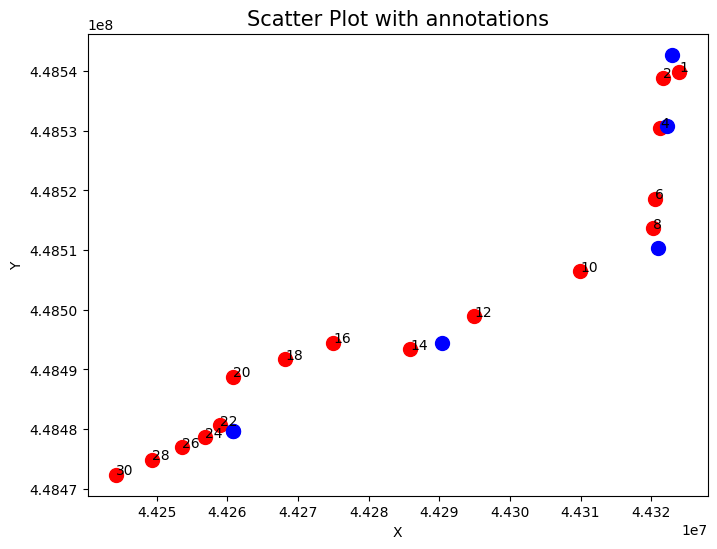

<Figure size 800x800 with 0 Axes>

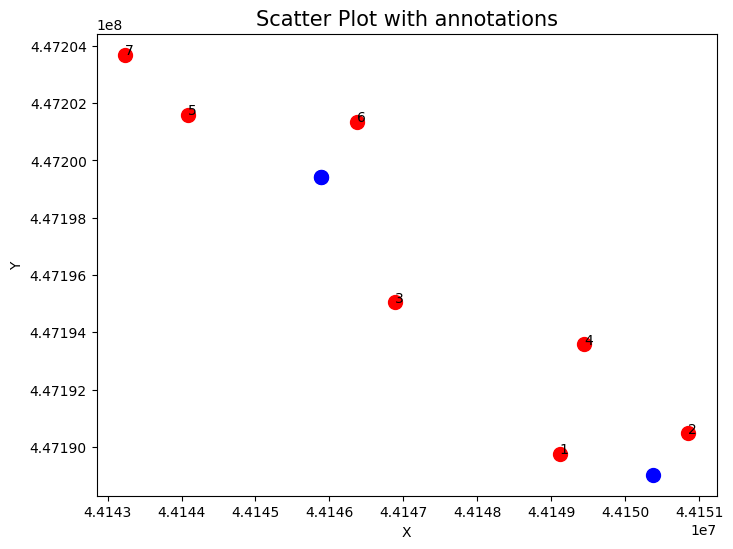

<Figure size 800x800 with 0 Axes>

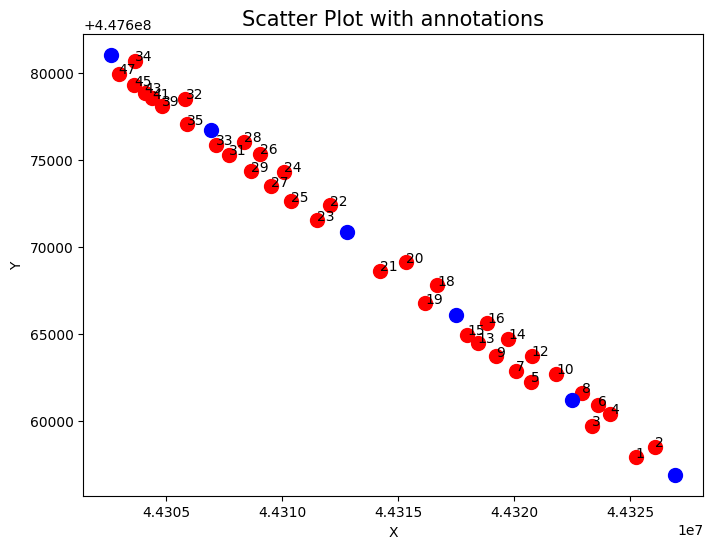

<Figure size 800x800 with 0 Axes>

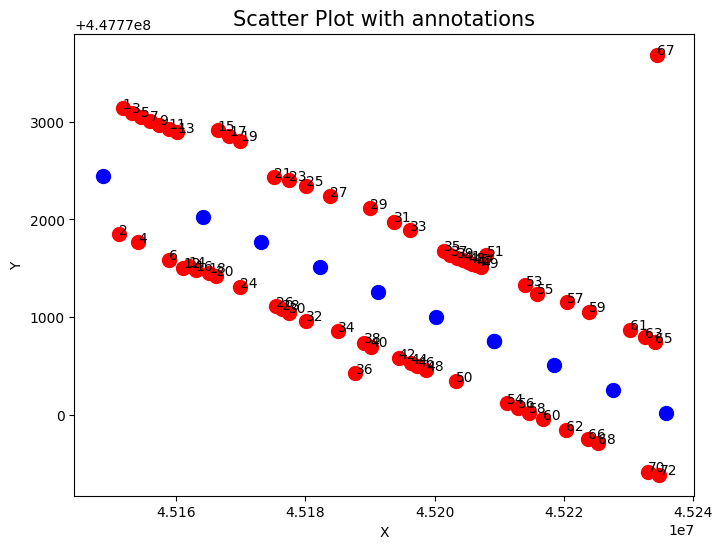

<Figure size 800x800 with 0 Axes>

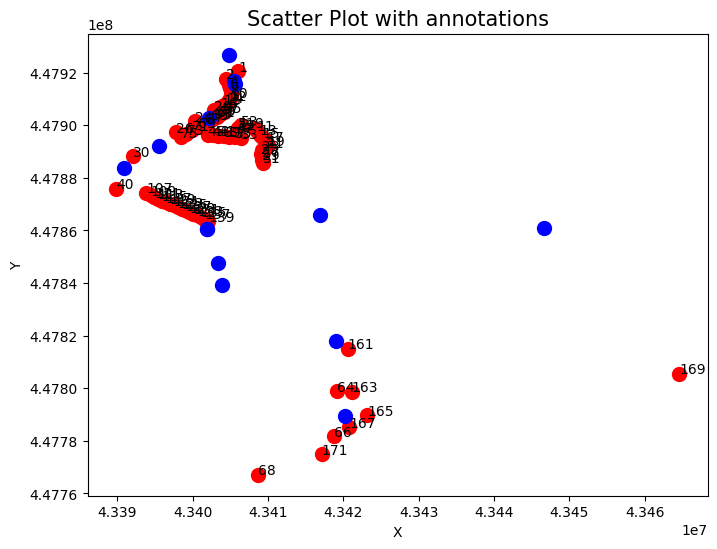

In [250]:
import warnings
warnings.filterwarnings('ignore')

d = direcciones[['Codigo de via', 'Coordenada X (Guia Urbana) cm', 'Coordenada Y (Guia Urbana) cm', 'Direccion']]
display(d.head())
d['tipo'] = ['direcciones' for i in range(len(d))]
a = []

for i in d['Direccion'].values:
    #d['Direccion'] = 
    i = i.replace('ï¿½', '')
    try:
        a.append(int(i.split('-')[1]))
    except:
        print(i)
d['Direccion'] = a
d = d.rename(columns={'Codigo de via': 'codigo'})
d = d.rename(columns={'Coordenada X (Guia Urbana) cm': 'x'})
d = d.rename(columns={'Coordenada Y (Guia Urbana) cm': 'y'})

d = d[d['x'] != '000000-100']
d['codigo'] = d['codigo'].astype(int)


d['x'] = d['x'].astype(int)
d['y'] = d['y'].astype(int)


c = cruces[['Codigo de vía tratado', 'Coordenada X (Guia Urbana) cm (cruce)', 'Coordenada Y (Guia Urbana) cm (cruce)']]
c['tipo'] = ['cruces' for i in range(len(c))]

c = c.rename(columns={'Codigo de vía tratado': 'codigo'})
c = c.rename(columns={'Coordenada X (Guia Urbana) cm (cruce)': 'x'})
c = c.rename(columns={'Coordenada Y (Guia Urbana) cm (cruce)': 'y'})
c['codigo'] = c['codigo'].astype(int)
c['x'] = c['x'].astype(int)
c['y'] = c['y'].astype(int)

# for cruce in c.iterrows():

# ordenar d por coordenadas y codigo de via

d = d.sort_values(by=['codigo', 'x', 'y'])
display(d.head(20))

# graficar los puntos del codigo 127
import matplotlib.pyplot as plt
for n in [127,31005685,375700, 287600, 369600]:
    plt.figure(figsize=(8, 8))

    x = d[d['codigo'] == n]['x']
    y = d[d['codigo'] == n]['y']

    annotations=[i.Direccion for i in d[d['codigo'] == n].itertuples()]
    plt.figure(figsize=(8,6))
    plt.scatter(x,y,s=100,color="red")
    plt.scatter(c[c['codigo']== n]['x'], c[c['codigo']== n]['y'],s=100,color="blue")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Scatter Plot with annotations",fontsize=15)
    for i, label in enumerate(annotations):
        plt.annotate(label, (x.values[i], y.values[i]))

    plt.show()

In [251]:
numeros_cruces = []
for cruce in c.iterrows():
    d_temp = d[d['codigo'] == cruce[1]['codigo']]
    x, y = cruce[1]['x'], cruce[1]['y']
    distancia_min = 10e10
    num = ''
    for dir in d_temp.iterrows():
        x1, y1 = dir[1]['x'], dir[1]['y']
        distancia = ((x1 - x)**2 + (y1 - y)**2)**0.5
        distancia_min = min(distancia, distancia_min)
        if distancia_min == distancia:
            num = dir[1]['Direccion']
    numeros_cruces.append(num)
c['numero'] = numeros_cruces
    
        
        

In [252]:
# Primero, en la columna de Literal de numeracion, reemplazamos "KM.", " ", "EN", "SA", "NUM" por ""
# for replacement in ['KM.', ' ', 'EN', 'SA', 'NUM']:
#     direcciones['Literal de numeracion'] = direcciones['Literal de numeracion'].str.replace(replacement, '')

# Creamos una columna en la que almacenamos la direccion de la forma <codigo de via>-<literal de numeracion (sin letras)>


c.sort_values(by=['codigo', 'numero'], inplace=True)
c.reset_index(inplace=True, drop=True)
c

,codigo,x,y,tipo,numero
0,127,44322976,448542753,cruces,1
1,127,44322285,448530840,cruces,4
2,127,44320997,448510385,cruces,8
3,127,44290433,448494484,cruces,14
4,127,44260746,448479753,cruces,22
...,...,...,...,...,...
36160,31003706,44083665,446665463,cruces,7
36161,31004081,43390886,447883842,cruces,
36162,31005685,44150370,447189024,cruces,1
36163,31005685,44145890,447199432,cruces,6


In [1]:
class Vertice:
    def __init__(self, id=None, calles=[], nodos_adyacentes=[], coordenadas=()):
        self.id = id
        self.calles = calles
        self.nodos_adyacentes = nodos_adyacentes
        self.coordenadas = coordenadas


In [ ]:
# Queremos definir todos los vertices con la clase Vertice, en la que 
# id es un numero entero (cada vez que cambiamos de nodo, aumentamos el id en 1)
# calles es una lista de las calles que pasan por el nodo
# nodos_adyacentes es una lista de los nodos adyacentes al nodo (en el orden en que aparecen en calles)
# coordenadas es una tupla con las coordenadas del nodo (x, y)

nodos_creados = {}
id = 1
for codigo in c['codigo'].unique():
    nodos_calle = []
    c_temp = c[c['codigo'] == codigo]
    for idx, row in c_temp.iterrows():
        coords = (row['x'], row['y'])
        if coords not in nodos_creados:
            v = Vertice(id=id, coordenadas=coords)
            nodos_creados[coords] = v
            v.calles.append(codigo)
        else:
            v = nodos_creados[coords]
            v.calles.append(codigo)
        nodos_calle.append(v.id)
        if idx != 0:
            v.nodos_adyacentes.append(nodos_calle[-2])
        id += 1

# Luego sigo

## Cosas q hacer:

- Calles con numeros y letras unificarlas en un numero (hacer media de coordenadas)
- Introducir cruces en dataset de direcciones en su lugar correspondiente
- Navegar por los nodos, guardando informacion de las calles que cruzan, coordenadas y nodos adyacentes.
- Crear un grafo con las calles y sus cruces


## Dudas

- ¿Se puede crear una nueva columna?
- ¿Qué hacemos con los valores erróneos?